## Learning outcomes: We will learn/review
## [A] Gram Schmidt Diagonalisation
## [B] Arnoldi
## [C] Krylov and Lanczos [not now.]



We will follow the notation in Wikipedia, so that you can reference it readily https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process

## [SG1] Let $proj_{u}(v):=\frac{\langle v\vert u\rangle}{\langle u\vert u\rangle}\vert u\rangle$

## [SG2] Given $k$ vectors $\{\vert v_i\rangle\}$, the Gram-Schmidt algorithm (which you should be studying in Math Phys and PH434 Quantum Mechanics) is given by the following ORTHOGONAL construction of vectors $\{\vert u_i\rangle\}$.

## $\vert u_1\rangle=\vert v_1\rangle$

## $\vert u_2\rangle=\vert v_2\rangle-proj_{u_1}(\vert v_2\rangle)$

## $\vert u_k\rangle=\vert v_k\rangle-\sum_{j=1}^{k-1}proj_{u_j}(\vert v_k\rangle)$

## [SG3] You may further normalize $\{\vert v_i\rangle\}$ to get a ORTHONORMAL set $\{\vert e_i\rangle\}$. (See https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process#Numerical_stability for modified GS, which has better numerical stability.)

## [1] Write a code to implement GramSchmidt. It should accept a square matrix, whose first index is the vector index and whose second index stores the corresponding vector (i.e., M[i,:] should be $v_i$) and whose output is a matrix of the same size, but orthonormal. 

### In Linear algebra, the order $r-$Krylov subspace generated by a $n\times n$ matrix and a vector $\vert b\rangle$ is given by $span(\vert b\rangle,\vert A b\rangle,\vert A^2 b\rangle,\ldots \vert A^{r-1}b\rangle)$
### "The Arnoldi method" starts with a Krylov subspace of a pair $\{A,\vert b\rangle\}$ and constructs a set of $r$ projectors. These projectors can be used to approximate $e^{At}\vert b\rangle$ for some time $t$ which is related to $r$.

## [2] Write a code to implement Krylov. It should accept $\{A,\vert b\rangle,r\}$ and return $r$ vectors. Use GramSchmidt above to produce a Arnoldi projection of $e^At\vert b\rangle$. 

## [3] Consider the matrix $H=\omega_0\hat{n}+J(\hat{a}+\hat{a}^\dag)$. Here $\hat{n}=\sum_{k=0}^{N}k\vert k\rangle\langle k\vert$ and $\hat{a}=\sum_{k=0}^{N}\sqrt{k}\vert k-1\rangle\langle k\vert$. Write a code to implement Arnoldi on $e^{-i Ht}\vert\psi\rangle$ where $\vert\psi\rangle=\frac{\vert 33\rangle + \vert 44\rangle}{\sqrt 2}$. Here $\vert k\rangle$ has zeros everywhere in a column vector except entry $k$, which is 1. Take $N=10000$ and explore for different times $t$.

 Lets do Lanczos once this is all a bit more clear.. Here is a code for HINTON diagrams you can use for your class. Its taken from https://matplotlib.org/stable/gallery/specialty_plots/hinton_demo.html

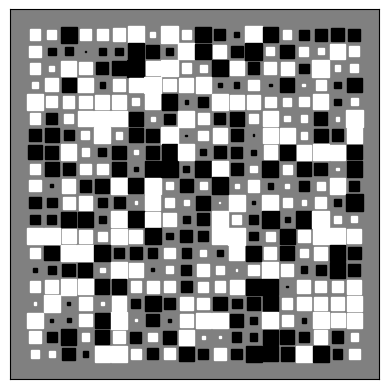

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()